## Final Project Submission

Please fill out:
* Student name: Minna Fingerhood
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Fangfang
* Blog post URL:


In [18]:
# Your code here - remember to use markdown cells for comments as well!

In [19]:
#how does date affect the price of houses?
#heatmap of lat/long at house prices?
#how does bathroom and square footage -- high correlation demonstrated by heatmap






assingment: 
    - You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

questions to keep in mind:

    -"how did you pick the question(s) that you did?"
    -"why are these questions important from a business perspective?"
    -"how did you decide on the data cleaning options you performed?"
    -"why did you choose a given method or library?"
    -"why did you select those visualizations and what did you learn from each of them?"
    -"why did you pick those features as predictors?"
    -"how would you interpret the results?"
    -"how confident are you in the predictive quality of the results?"
    -"what are some of the things that could cause the results to be wrong?"

In [2]:
#import data and packages
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
%matplotlib inline


In [3]:
df = pd.read_csv('kc_house_data.csv')
df.date.value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/28/2015     121
4/22/2015     121
7/9/2014      121
4/14/2015     121
6/24/2014     119
4/21/2015     119
8/26/2014     117
10/28/2014    117
7/14/2014     116
5/20/2014     116
7/1/2014      115
8/20/2014     114
4/29/2015     113
6/17/2014     113
4/8/2015      112
7/29/2014     112
7/16/2014     111
5/28/2014     111
4/23/2015     110
8/5/2014      109
8/25/2014     109
3/27/2015     109
8/11/2014     107
7/23/2014     107
             ... 
3/15/2015       3
2/14/2015       3
8/10/2014       3
11/15/2014      2
5/10/2015       2
12/27/2014      2
8/24/2014       2
12/21/2014      2
9/7/2014        2
7/4/2014        2
8/9/2014        2
11/28/2014      2
10/11/2014      2
2/1/2015        2
5/11/2014       2
12/7/2014       2
5/24/2015       1
5/17/2014       1
1/10/2015       1
11/2/2014       1
5/27/2015       1
8/3/2014        1
1/31/2015       1
1/17/2015       1
3/8/2015  

In [4]:
#data cleaning code: 

#duplicates are a result of the same house being sold another time... Therefore do not need to delete 
df[df.id.duplicated(keep=False)].head()


#removing outliers:



#yr_renovated column has both nan and 0.0 filler values... changes all to nan so 0.0 doesn't skew the data 
df['yr_renovated'] = df['yr_renovated'].replace(0.0, np.nan)


#Should replace null values with 0 because categorical for the column.
#going to try with converting null values to 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)

#had to apply log function to columns(price, sqft_above, sqft_living)

#sqft_basement was in string format, so had to convert and then replaced 0.0 with null to find median without skewed outliers
#used median to replace null values so that it did not alter mean too much... mean went from 740 to 716 once we replaced 
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'] = df['sqft_basement'].replace(0.0, np.nan)
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

## made graphs determining the frequency of each variable as well as heat map for correlation (looked specifically at price row)
##need to figure out which ones to use in model by determining which are most evenly distributed and most correlated to price 
df.corr()[abs(df.corr() > 0.75)] #determining high correlations 


#remove outliers:
for col in df.columns:
    q1 = df['{}'.format(col)].quantile(0.25)
    q3 = df['{}'.format(col)].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df['{}'.format(col)] > fence_low) & (df['{}'.format(col)] < fence_high)]
    print(df_out)


#found that bathrooms, seqft_living, grade, sqft_above, sqft_living15 are most correlated to price 





               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   468000.0         2       1.00   

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
df.head()

In [ ]:
df.view.value_counts()

In [ ]:
df.view.value_counts()

In [ ]:
#Inspecting Data: Waterfront and yr_renovated have a lot of null objects... 
df.info()

In [ ]:
df.describe()

In [ ]:
#check & inspect duplicates
df[df.id.duplicated(keep=False)].head()
#duplicates are a result of the same house being sold another time... Therefore do not need to delete 

In [ ]:
#Cleaning Data!! 

In [ ]:
#yr_renovated column has both nan and 0.0 filler values... changes all to nan so 0.0 doesn't skew the data 
df['yr_renovated'] = df['yr_renovated'].replace(0.0, np.nan)

In [ ]:
df['yr_renovated'].describe()

In [ ]:
#df.waterfront.value_counts() #for waterfronts we have 19075 entries for 0.0
#df.waterfront.isnull().value_counts() #we also have 2376 null values... Should replace null values with 0 because categorical for the column. But are null values the same as no waterfront or was the information just unavailable?
#df[df.waterfront.isnull()].head()
#going to try with converting null values to 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)


In [ ]:
df.waterfront.isnull().value_counts()

In [ ]:
df.columns

In [ ]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'] = df['sqft_basement'].replace(0.0, np.nan)
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

In [ ]:
df['sqft_basement'].describe()

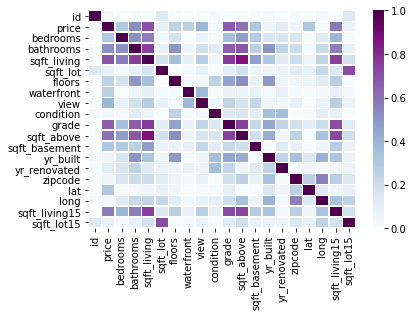

In [5]:

fig = sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidth = .5)
fig


In [6]:
df.groupby('bathrooms').price.describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.50,4.0,2.373750e+05,8.888886e+04,109000.0,218500.0,264000.0,282875.0,312500.0
0.75,71.0,2.949366e+05,1.390220e+05,80000.0,201000.0,275000.0,355000.0,785000.0
1.00,3851.0,3.470721e+05,1.545674e+05,78000.0,230000.0,320000.0,425000.0,1300000.0
1.25,9.0,6.217722e+05,4.088817e+05,275000.0,360000.0,516500.0,545000.0,1390000.0
1.50,1445.0,4.094297e+05,1.939307e+05,107000.0,265950.0,370000.0,495800.0,1500000.0
1.75,3048.0,4.549158e+05,2.020492e+05,115000.0,310000.0,422900.0,555000.0,3280000.0
2.00,1930.0,4.579050e+05,2.060723e+05,115000.0,300500.0,423250.0,563000.0,2200000.0
2.25,2047.0,5.337688e+05,2.811597e+05,160000.0,339975.0,472500.0,625000.0,2400000.0
2.50,5377.0,5.538033e+05,2.670712e+05,153503.0,365000.0,499950.0,675000.0,3070000.0


In [7]:
price_vs_bathrooms = smf.ols(formula = 'price~bathrooms+sqft_living+view',data=df).fit()
price_vs_bathrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:20:18   Log-Likelihood:            -2.9818e+05
No. Observations:               21534   AIC:                         5.964e+05
Df Residuals:                   21530   BIC:                         5.964e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.666e+04   5031.008     -3.310      0.001   -2.65e+04   -6793.935
bathrooms    1046.9201   3381.581      0.310      0.757   -5581.230    7675.070
sqft_living   255.0653      2.901     87.908      0.000     249.378     260.752
view         1.026e+05   2319.239     44.260      0.000    9.81e+04    1.07e+05
==============================================================================
Omnibus:                    14039.827   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           533664.907
Skew:                           2.600   Prob(JB):                         0.00
Kurtosis:                      26.827   Cond. No.                     7.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
price_vs_sqft_living = smf.ols(formula = 'price~sqft_living',data=df).fit()
price_vs_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:20:18   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
price_vs_sqft_living = smf.ols(formula = 'price~sqft_above+sqft_basement',data=df).fit()
price_vs_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     7491.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:20:18   Log-Likelihood:            -3.0170e+05
No. Observations:               21597   AIC:                         6.034e+05
Df Residuals:                   21594   BIC:                         6.034e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.291e+05   6596.777    -19.574      0.000   -1.42e+05   -1.16e+05
sqft_above      250.7419      2.364    106.066      0.000     246.108     255.376
sqft_basement   308.5235      7.765     39.731      0.000     293.303     323.744
==============================================================================
Omnibus:                    14846.164   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486467.384
Skew:                           2.873   Prob(JB):                         0.00
Kurtosis:                      25.529   Cond. No.                     7.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

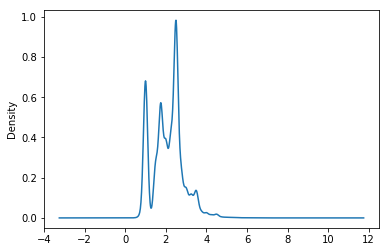

In [10]:
df.bathrooms.plot.kde()

In [11]:
for i, (name, col) in enumerate(df.iterateitems()):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-11-432f842ba7e6>, line 2)

In [ ]:
df.zipcode.describe()

In [ ]:
sns.scatterplot(df.zipcode, df.price)

In [ ]:
price_vs_size_neighbors = smf.ols(formula = 'price~zipcode',data=df).fit()
price_vs_size_neighbors.summary()

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
for column in df:
    df[column].plot.hist(normed=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [ ]:
df.corr()[(df.corr() > 0.5)]

In [ ]:
sqft_vs_others = smf.ols(formula = 'sqft_living~sqft_above+sqft_basement+sqft_living15+sqft_lot15',data=df).fit()
sqft_vs_others.summary()

In [ ]:

model = smf.ols(formula='price ~ bathrooms + sqft_living + grade + sqft_above + sqft_living15', data = df).fit()
model.summary()

In [ ]:
sns.distplot(df['bedrooms'], kde=True)

In [ ]:
df.head()

In [ ]:


for col in df.columns:   
    try:
        q = df["{}".format(col)].quantile(0.99)
        filter(df[df["col"] < q])
    
    except:
        pass
    
    print(df['bedrooms'].max())
    

In [ ]:
#def remove_outlier(df):
    
for col in df.columns:
    try:
        q1 = df['{}'.format(col)].quantile(0.25)
        q3 = df['{}'.format(col)].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_clean = df.loc[(df['{}'.format(col)] > fence_low) & (df['{}'.format(col)] < fence_high)]
        
    except:
        df_clean['{}'.format(col)] == df['{}'.format(col)]
    
    print(df_clean)
    



In [ ]:
df_out.hist(bins = 10, figsize = (10,10))

In [12]:
price_vs_sqft_living_grade  = smf.ols(formula = 'price~bathrooms + sqft_living + grade',data=df).fit()
price_vs_sqft_living_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:20:20   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
corr = df.corr()
abs(corr).sort_values(by = 'price',  ascending= False)['price']

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
sqft_basement    0.319466
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.125499
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

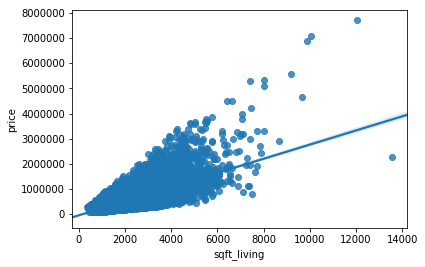

In [14]:
sns.regplot(x=df.sqft_living, y=df.price, data=df_out)

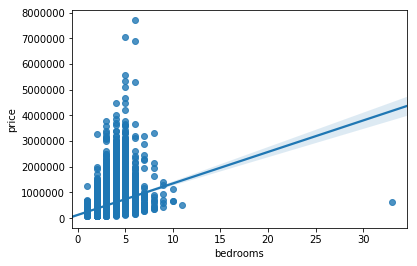

In [15]:
sns.regplot(x=df.bedrooms, y=df.price, data=df)

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ bathrooms + sqft_living + grade + sqft_above + sqft_living15"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:46:04   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from sklearn.linear_model import LinearRegression

y = df['price']
predictors = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
linreg.coef_

array([-3.56726235e+04,  2.45563129e+02,  1.11909971e+05, -8.06960896e+01,
        2.22597862e+01])

In [34]:
linreg.intercept_

-651962.7629339094

In [36]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors, df["price"])


In [37]:
selector.support_ 

array([ True, False,  True, False, False])

In [38]:
selector.ranking_

array([1, 2, 1, 3, 4])

In [39]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 69651.29877729 178759.90031138]
-976001.6769910685


In [42]:
from sklearn.model_selection import train_test_split
X = predictors
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [44]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [45]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 60196066388.51114
Test Mean Squarred Error: 66678114815.3586


In [46]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 60196066388.51114
Test Mean Squarred Error: 66678114815.3586
